# Home Credit Default Risk - Exploratory Data Analysis

## 1. Goal
This assignment requires learners to:
- Understand the structure of a real-world business dataset
- Explore customer attributes and their relationship to default risk
- Practice handling missing values and class imbalance
- Formulate reasonable business-driven questions


## 1. Load dataset
Load `application_train.csv` into a Pandas DataFrame.


In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("application_train.csv")
print("Shape:", data.shape)
data.head()

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Dataset overview
Check first rows, datatypes, and summary statistics etc. to understand data structure.

In [2]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.describe().T.head(10) # transposed

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


## 3. Target variable (default risk)
The target variable is `TARGET`: 1 = default, 0 = non-default.

In [7]:
print(data['TARGET'].value_counts())

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [9]:
print(data['TARGET'].value_counts(normalize=True)) # to get a real representation, values between 0 and 1

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


## 4. Missing values
Check missingness, visualize, and drop columns/rows

<Axes: >

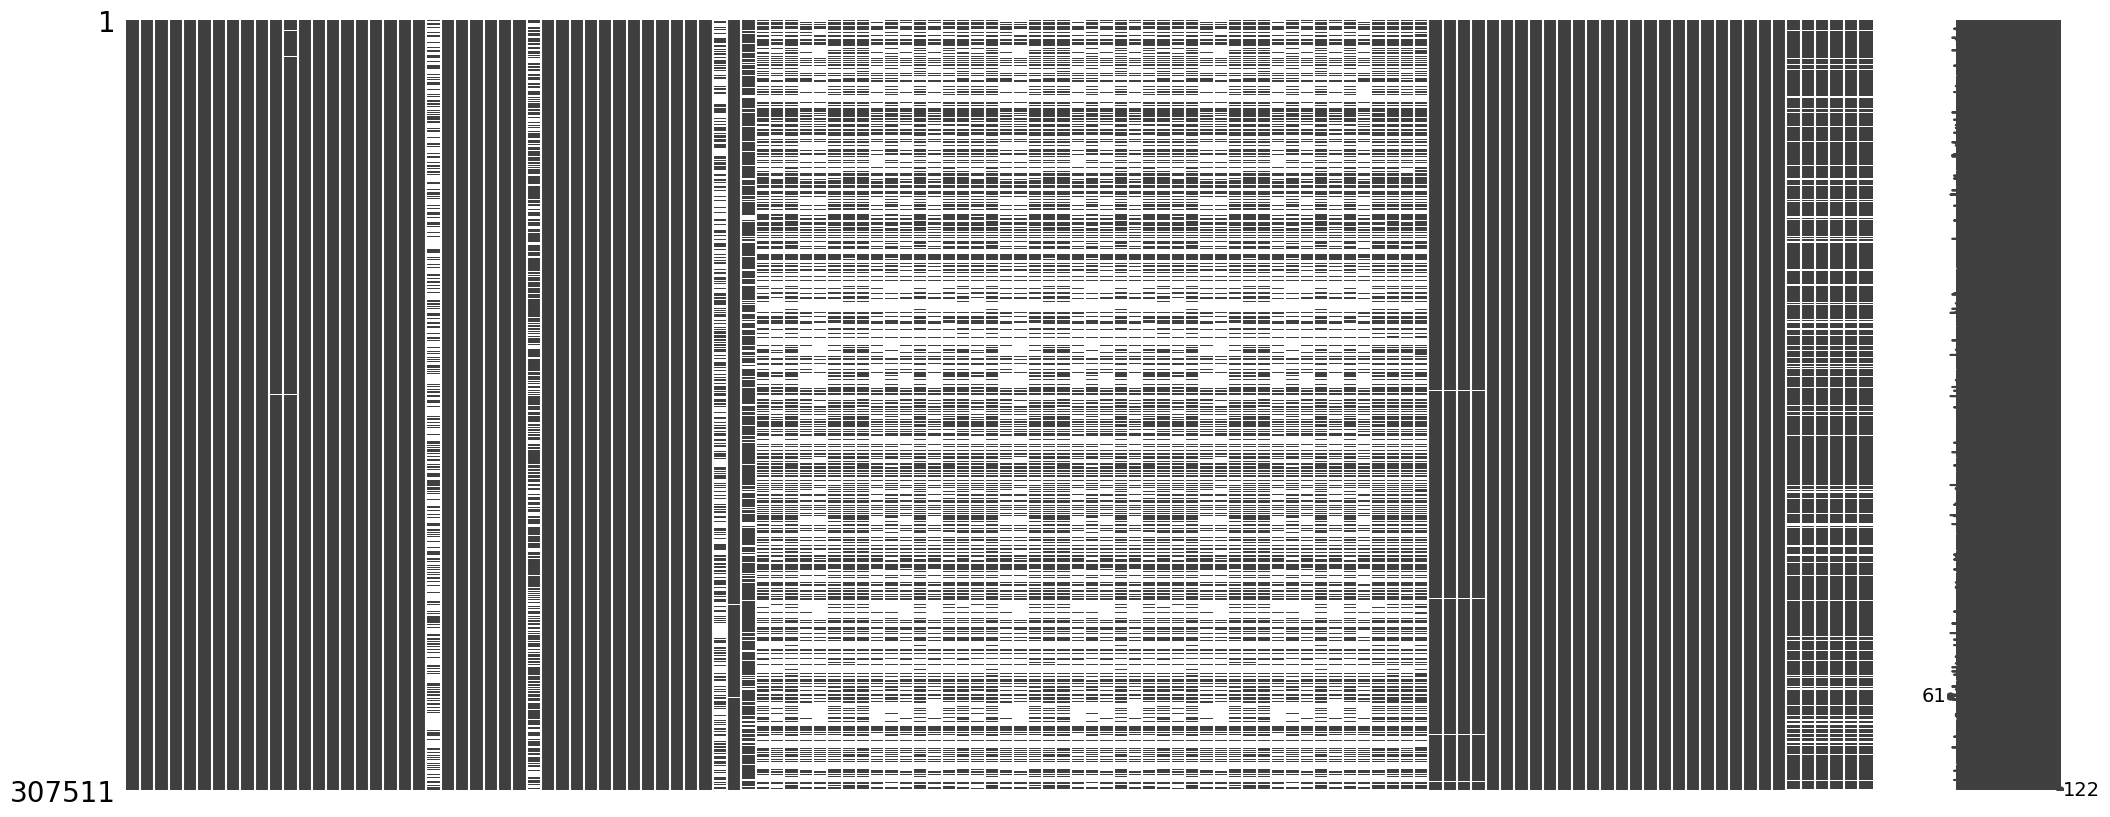

In [10]:
import missingno as msno
msno.matrix(data)

In [11]:
missing_ratio = data.isnull().sum() / len(data)
missing_ratio = missing_ratio[missing_ratio > 0].sort_values(ascending=False)
print("Missing ratios (top 20):")
print(missing_ratio.head(20))

Missing ratios (top 20):
COMMONAREA_MEDI             0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_AVG              0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MEDI              0.678486
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
YEARS_BUILD_AVG             0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_AVG                0.593767
LANDAREA_MEDI               0.593767
LANDAREA_MODE               0.593767
dtype: float64


In [12]:
# Drop columns with >=5 missing values
data_reduced = data.dropna(axis=1, thresh=len(data)-5)

# Drop remaining rows with missing values
data_reduced = data_reduced.dropna()

print("Shape before:", data.shape)
print("Shape after:", data_reduced.shape)

Shape before: (307511, 122)
Shape after: (307508, 57)


We have dropped a very large number of columns

## 5. Class Imbalance
Visualize percentage of defaults vs non-defaults.

In [14]:
# Map 0 → Non-Default, 1 → Default
data_reduced['TARGET_LABEL'] = data_reduced['TARGET'].map({0: "Non-Default", 1: "Default"})

# Value counts with percentages
print(data_reduced['TARGET_LABEL'].value_counts(normalize=True) * 100)

TARGET_LABEL
Non-Default    91.927039
Default         8.072961
Name: proportion, dtype: float64


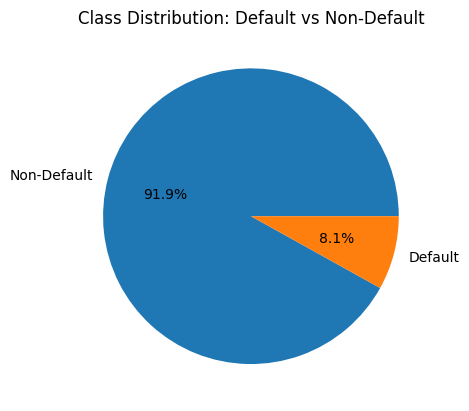

In [15]:
import matplotlib.pyplot as plt

counts = data_reduced['TARGET_LABEL'].value_counts()
plt.title("Class Distribution: Default vs Non-Default")
plt.pie(counts, labels=counts.index, autopct="%.1f%%")
plt.show()

## 6. Demographics and Risk
Explore relationships between demographic features and default risk.

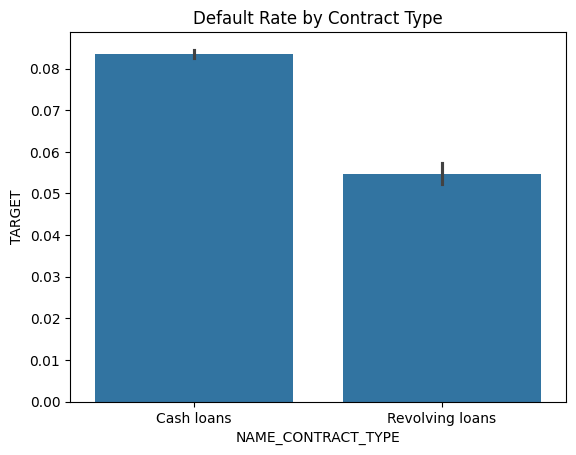

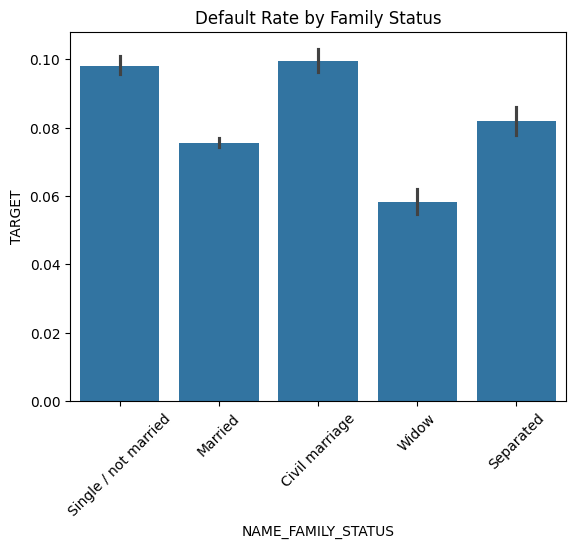

In [16]:
import seaborn as sns

sns.barplot(x="NAME_CONTRACT_TYPE", y="TARGET", data=data_reduced)
plt.title("Default Rate by Contract Type")
plt.show()

sns.barplot(x="NAME_FAMILY_STATUS", y="TARGET", data=data_reduced)
plt.title("Default Rate by Family Status")
plt.xticks(rotation=45)
plt.show()

From the first graph, we see that cash loans are more likely to be defaulted, as compared to revolving loans.

From default by family status analysis, (second graph), we see that unmarried and couples in civil marriages are more likely to default as compared to other classes.


### Age and default risk
Convert `DAYS_BIRTH` to age in years.


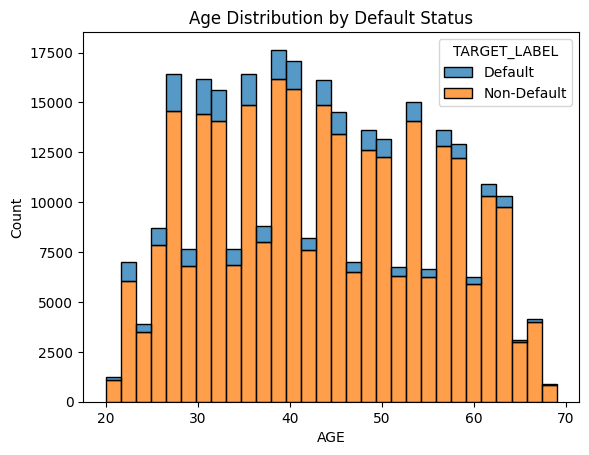

In [18]:
data_reduced['AGE'] = (-data_reduced['DAYS_BIRTH'] / 365).astype(int)
sns.histplot(data=data_reduced, x="AGE", hue=data_reduced['TARGET_LABEL'], bins=30, multiple="stack")
plt.title("Age Distribution by Default Status")
plt.show()

Younger people, aged ~25-45 are more likely to default as compared to other ages.

## 7. Income and Credit Ratios
Explore income, credit, and credit-to-income ratio.

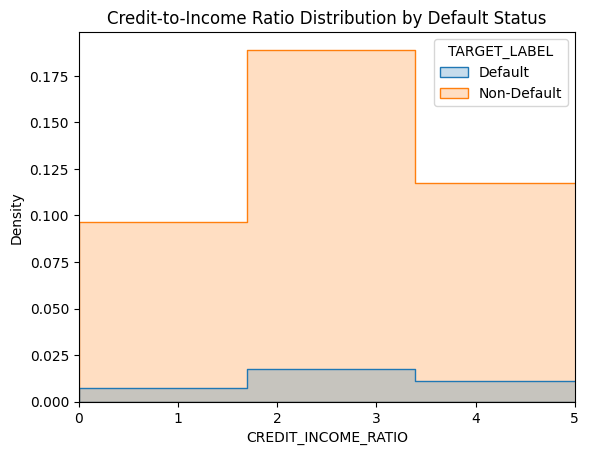

In [20]:
data_reduced['CREDIT_INCOME_RATIO'] = data_reduced['AMT_CREDIT'] / data_reduced['AMT_INCOME_TOTAL']

sns.histplot(data=data_reduced, x="CREDIT_INCOME_RATIO", hue=data_reduced['TARGET_LABEL'], bins=50, element="step", stat="density")
plt.title("Credit-to-Income Ratio Distribution by Default Status")
plt.xlim(0, 5)
plt.show()

## 8. Correlation coefficients
Find top 10 features correlated with TARGET.

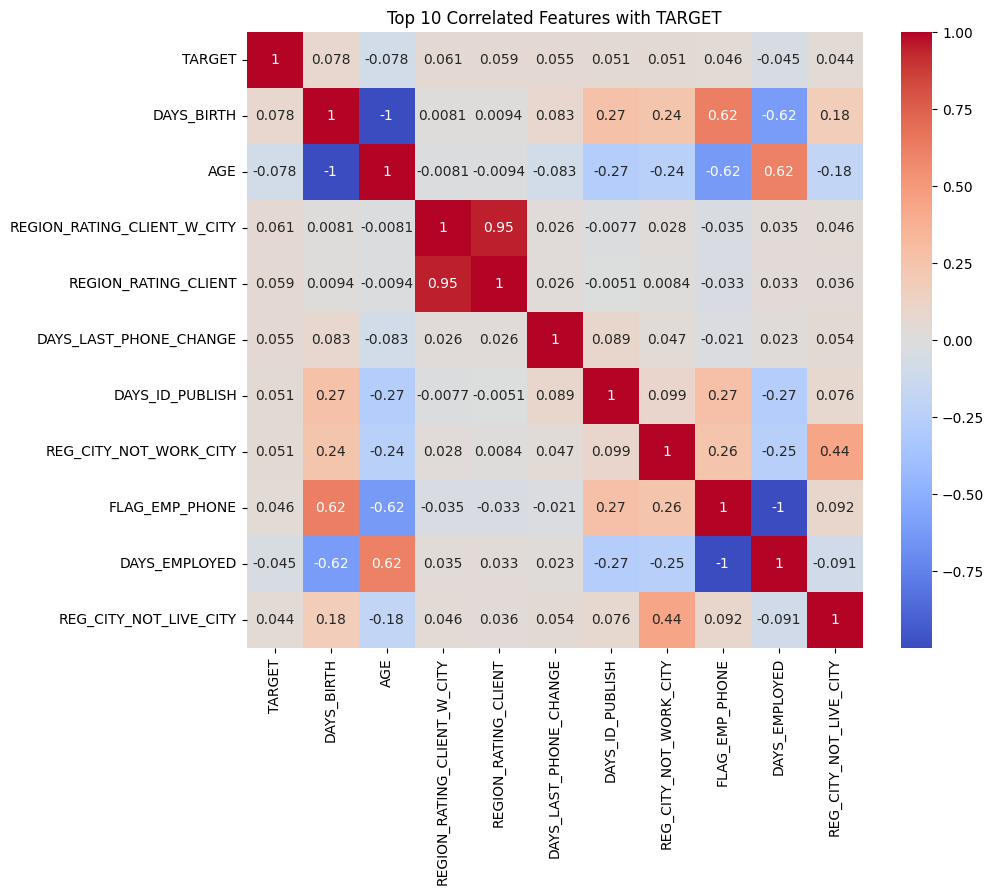

Top correlated features:
TARGET                         1.000000
DAYS_BIRTH                     0.078243
AGE                            0.078238
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050996
FLAG_EMP_PHONE                 0.045984
DAYS_EMPLOYED                  0.044933
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64


In [22]:
corr_all = data_reduced.corr(numeric_only=True)
top10_corr = corr_all['TARGET'].abs().sort_values(ascending=False).head(11).index

plt.figure(figsize=(10,8))
sns.heatmap(data_reduced[top10_corr].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Top 10 Correlated Features with TARGET")
plt.show()

print("Top correlated features:")
print(corr_all['TARGET'].abs().sort_values(ascending=False).head(11))